In [97]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from main_preprocess import output_path_lung_wov_attenuation as input_attenuation
from main_preprocess import load_nifti_convert_to_numpy, convert_numpy_to_nifti_and_save
from scipy import stats
from sklearn.mixture import GaussianMixture

ROI on 0002 and 0018

ROI on 0000 and 0018_2

In [3]:
nifti_path_0000='/Users/bruger/Desktop/Bachelor/attenuation filer/Lung-Pilot-1_0000_SERIES0020.nii'
nifti_path_0002='/Users/bruger/Desktop/Bachelor/attenuation filer/Lung-Pilot-1_0002_SERIES0024.nii.gz'
nifti_path_0018='/Users/bruger/Desktop/Bachelor/attenuation filer/Lung-Pilot-1_0018_SERIES0019.nii.gz'

roi_seg_path_0000='/Users/bruger/Desktop/Bachelor/roi_study/roi_seg_series_0000/Segmentation-Segment_1-label.nii.gz'
roi_seg_path_0002='/Users/bruger/Desktop/Bachelor/roi_study/roi_seg_series_0002/Segmentation-bilateral_ggo-label.nii.gz'
roi_seg_path_0018='/Users/bruger/Desktop/Bachelor/roi_study/roi_seg_series_0018/Segmentation-Segment_1-label.nii.gz'
roi_seg_path_0018_2='/Users/bruger/Desktop/Bachelor/roi_study/roi_seg_series_0018_2/Segmentation-Segment_1-label.nii.gz'

In [4]:
ct_0000 = load_nifti_convert_to_numpy(input_path=nifti_path_0000)
ct_0002 = load_nifti_convert_to_numpy(input_path=nifti_path_0002)
ct_0018 = load_nifti_convert_to_numpy(input_path=nifti_path_0018)

In [5]:
roi_seg_0000 = load_nifti_convert_to_numpy(input_path=roi_seg_path_0000)
roi_seg_0002 = load_nifti_convert_to_numpy(input_path=roi_seg_path_0002)
roi_seg_0018 = load_nifti_convert_to_numpy(input_path=roi_seg_path_0018)
roi_seg_0018_2 = load_nifti_convert_to_numpy(input_path=roi_seg_path_0018_2)

In [6]:
ct_roi_result_0000 = np.multiply(ct_0000,roi_seg_0000)
ct_roi_result_0002 = np.multiply(ct_0002,roi_seg_0002)
ct_roi_result_0018 = np.multiply(ct_0018,roi_seg_0018)
ct_roi_result_0018_2 = np.multiply(ct_0018,roi_seg_0018_2)

In [7]:
output_path_0000='/Users/bruger/Desktop/Bachelor/roi_study/roi_ct_results/roi_result_0000.nii.gz'
output_path_0002='/Users/bruger/Desktop/Bachelor/roi_study/roi_ct_results/roi_result_0002.nii.gz'
output_path_0018='/Users/bruger/Desktop/Bachelor/roi_study/roi_ct_results/roi_result_0018.nii.gz'
output_path_0018_2='/Users/bruger/Desktop/Bachelor/roi_study/roi_ct_results/roi_result_0018_2.nii.gz'

convert_numpy_to_nifti_and_save(np_file=ct_roi_result_0000, output_path=output_path_0000, original_nifti_path=nifti_path_0000)
convert_numpy_to_nifti_and_save(np_file=ct_roi_result_0002, output_path=output_path_0002, original_nifti_path=nifti_path_0002)
convert_numpy_to_nifti_and_save(np_file=ct_roi_result_0018, output_path=output_path_0018, original_nifti_path=nifti_path_0018)
convert_numpy_to_nifti_and_save(np_file=ct_roi_result_0018_2, output_path=output_path_0018_2, original_nifti_path=nifti_path_0018)

saving
saving
saving
saving


In [141]:
seg_result_0000_arr = ct_roi_result_0000.flatten()
seg_result_0002_arr = ct_roi_result_0002.flatten()
seg_result_0018_arr = ct_roi_result_0018.flatten()
seg_result_0018_2_arr = ct_roi_result_0018_2.flatten()

In [142]:
seg_result_0000_arr=seg_result_0000_arr[seg_result_0000_arr != 0]
seg_result_0002_arr=seg_result_0002_arr[seg_result_0002_arr != 0]
seg_result_0018_arr=seg_result_0018_arr[seg_result_0018_arr != 0]
seg_result_0018_2_arr=seg_result_0018_2_arr[seg_result_0018_2_arr != 0]

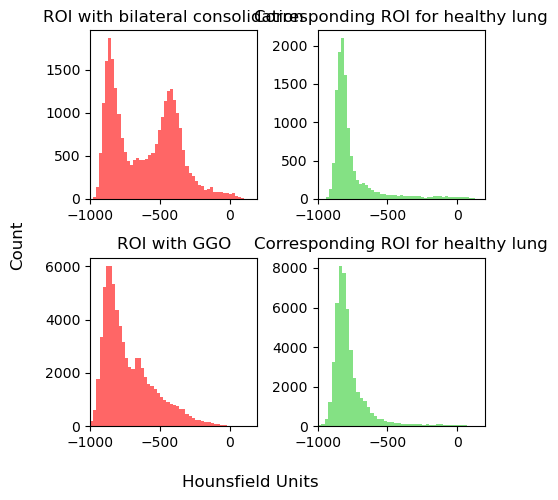

In [259]:
fig, axes = plt.subplots(2, 2, figsize=(5, 5)) 

# Plot histogram for seg_result_0002_arr on the first subplot
axes[0, 0].hist(seg_result_0002_arr, bins=50, color='red', alpha = 0.6)
axes[0, 0].set_title('ROI with bilateral consolidation')
axes[0, 0].set_xlim(-1000, 200)

# Plot histogram for seg_result_0018_arr on the second subplot
axes[0, 1].hist(seg_result_0018_arr, bins=50, color='limegreen', alpha = 0.6)
axes[0, 1].set_title('Corresponding ROI for healthy lung')
axes[0, 1].set_xlim(-1000, 200)

# Plot histogram for seg_result_0000_arr on the third subplot
axes[1, 0].hist(seg_result_0000_arr, bins=50, color='red', alpha = 0.6)
axes[1, 0].set_title('ROI with GGO')
axes[1, 0].set_xlim(-1000, 200)

# Plot histogram for seg_result_0018_2_arr on the fourth subplot
axes[1, 1].hist(seg_result_0018_2_arr, bins=50, color='limegreen', alpha = 0.6)
axes[1, 1].set_title('Corresponding ROI for healthy lung')
axes[1, 1].set_xlim(-1000, 200)

# Set common x and y labels for both subplots
fig.supxlabel('Hounsfield Units', fontsize=12)
fig.supylabel('Count', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


# Statistical analysis

## Tests

In [146]:
# Kruskal-wallis: test if median is the same (non-parametric)

_, pval_0002 = stats.kruskal(seg_result_0002_arr, seg_result_0018_arr)
_, pval_0000 = stats.kruskal(seg_result_0000_arr, seg_result_0018_2_arr)
_, pval_healthy = stats.kruskal(seg_result_0018_arr, seg_result_0018_2_arr)


In [147]:
print(f'0002 and 0018 median are statistically significantly different with a p-value = {pval_0002}')
print(f'0002 and 0018 median are statistically significantly different with a p-value = {round(pval_0000,5)}')
print(f'0002 and 0018 median are statistically significantly different with a p-value = {round(pval_healthy,5)}')

0002 and 0018 median are statistically significantly different with a p-value = 0.0
0002 and 0018 median are statistically significantly different with a p-value = 0.0
0002 and 0018 median are statistically significantly different with a p-value = 0.01108


In [148]:
# Kolmogorov-Smirnow: test if sample comes from reference distribution (non-parametric)

_, pval_0002 = stats.ks_2samp(seg_result_0002_arr, seg_result_0018_arr)
_, pval_0000 = stats.ks_2samp(seg_result_0000_arr, seg_result_0018_2_arr)
_, pval_healthy = stats.ks_2samp(seg_result_0018_arr, seg_result_0018_2_arr)

In [149]:
print(f'0002 and 0018 distribution are statistically significantly different with a p-value = {pval_0002}')
print(f'0002 and 0018 distribution are statistically significantly different with a p-value = {round(pval_0000,5)}')
print(f'0002 and 0018 distribution are statistically significantly different with a p-value = {round(pval_healthy,5)}')

0002 and 0018 median are statistically significantly different with a p-value = 0.0
0002 and 0018 median are statistically significantly different with a p-value = 0.0
0002 and 0018 median are statistically significantly different with a p-value = 0.0


In [258]:
n_samples=100000
sampled_0000 = np.random.choice(seg_result_0000_arr, size=n_samples, replace=True)
sampled_0002 = np.random.choice(seg_result_0002_arr, size=n_samples, replace=True)
sampled_0018 = np.random.choice(seg_result_0018_arr, size=n_samples, replace=True)
sampled_0018_2 = np.random.choice(seg_result_0018_2_arr, size=n_samples, replace=True)

sampled_data = [sampled_0000, sampled_0002, sampled_0018, sampled_0018_2]


In [160]:
_, pval_0002 = stats.ks_2samp(sampled_0002, sampled_0018)
_, pval_0000 = stats.ks_2samp(sampled_0000, sampled_0018_2)
_, pval_healthy = stats.ks_2samp(sampled_0018, sampled_0018_2)

print(f'0002 and 0018 distribution are statistically significantly different with a p-value = {pval_0002}')
print(f'0000 and 0018_2 distribution are statistically significantly different with a p-value = {round(pval_0000,5)}')
print(f'0018 and 0018_2 distribution are statistically significantly different with a p-value = {round(pval_healthy,5)}')

0002 and 0018 distribution are statistically significantly different with a p-value = 0.0
0000 and 0018_2 distribution are statistically significantly different with a p-value = 0.0
0018 and 0018_2 distribution are statistically significantly different with a p-value = 0.0


In [269]:
def transform_data(data, lamb=0.5, e=1e-6):
    translated_data = data + abs(min(data)) + e #make all values positive
    log_transformed = np.log(translated_data)
    sqrt_transformed = np.sqrt(translated_data)
    boxcox_transformed = (translated_data**lamb - 1)/lamb

    _, axes = plt.subplots(2, 2, figsize=(5, 5)) 
    transformations = [
        ('Original Data', translated_data),
        ('Log Transformed', log_transformed),
        ('Square Root Transformed', sqrt_transformed),
        (f'Box-Cox Transformed, lambda={lamb}', boxcox_transformed)
    ]

    for i, (title, transformed_data) in enumerate(transformations):
        ax = axes[i // 2, i % 2] 
        ax.hist(transformed_data, bins=50, color=np.random.rand(3,), alpha=0.7)
        ax.set_title(title)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

    return transformations

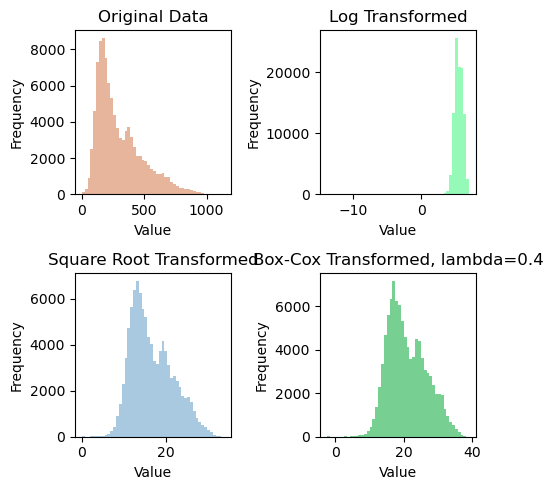

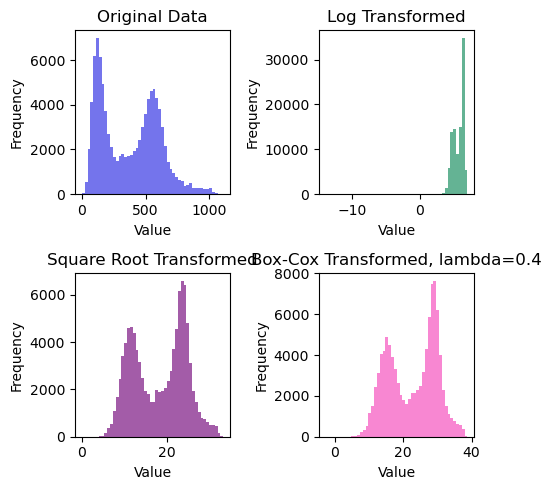

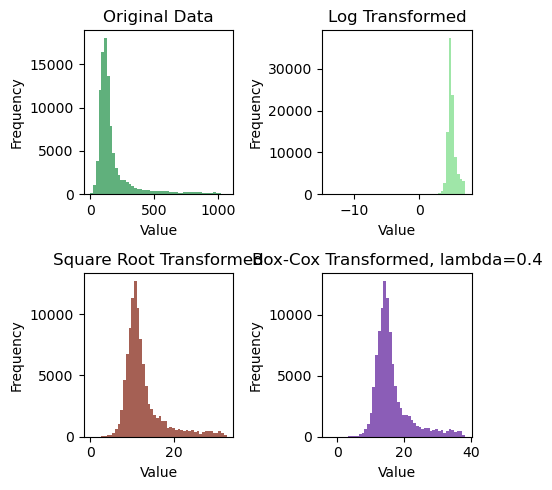

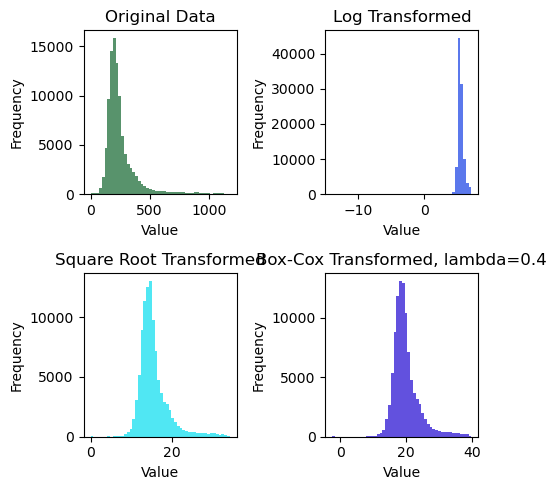

In [272]:
for data in sampled_data:
    transform_data(data, lamb=0.4)

# GMM (gaussian mixture model)

In [ ]:
# def fit_gmm(data):
#     gmm = GaussianMixture(n_components=2)  # Two components
#     gmm.fit(data.reshape(-1, 1))  # Reshape the data to 2D for sklearn
    
#     return gmm

# def fit_gaussian_pdf(data):
#     mean, std = np.mean(data), np.std(data)
#     single_gaussian_pdf = stats.norm.pdf(np.sort(data), loc=mean, scale=std)

#     return single_gaussian_pdf

In [85]:
def plot_gmm(data):
    gmm = GaussianMixture(n_components=2)  # Two components
    gmm.fit(data.reshape(-1, 1))  # Reshape the data to 2D for sklearn

    x = np.linspace(-1000, 200, 1000).reshape(-1, 1)  # Points to evaluate the model on
    logprob = gmm.score_samples(x)  # Log-likelihood of the GMM at each point
    pdf = np.exp(logprob)  # Convert log-likelihood to PDF

    # Plot the data histogram and the fitted GMM PDF
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Data histogram')
    plt.plot(x, pdf, label='Fitted GMM', color='red', lw=2)
    plt.title("Gaussian Mixture Model Fit to Data")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


In [291]:
def compute_aic_and_bic(log_likelihood, n, n_params):
    aic = 2 * n_params - 2 * log_likelihood
    bic = np.log(n) * n_params - 2 * log_likelihood
    
    return aic, bic

In [302]:
def compare_gaussian_models(data, ax, transform=None, lamb=0.5):
    """
    Compares a single Gaussian model with a Gaussian Mixture Model (GMM)
    using AIC and BIC criteria and plots the results on the given axis.
    
    Parameters:
        data (array-like): 1D array-like data to fit the models.
        ax (matplotlib.axis): Axis to plot the results on.
        transform (str): Optional transformation to apply ('log', 'sqrt', 'boxcox').
        lamb (float): Lambda value for Box-Cox transformation (default is 0.5).
        
    Returns:
        None
    """
    if transform is not None:
        data_translated = data + abs(min(data)) + 1e-6
    
        if transform == 'log':
            data = np.log(data_translated)
        elif transform == 'sqrt':
            data = np.sqrt(data_translated)
        elif transform == 'boxcox':
            data = (data_translated**lamb - 1) / lamb

    # Single Gaussian Model
    mean, std = np.mean(data), np.std(data)
    single_gaussian_pdf = stats.norm.pdf(np.sort(data), loc=mean, scale=std)

    # Fit GMM models with 2 and 3 components
    gmm2 = GaussianMixture(n_components=2, random_state=42)
    gmm2.fit(data.reshape(-1, 1))

    gmm3 = GaussianMixture(n_components=3, random_state=42)
    gmm3.fit(data.reshape(-1, 1))

    # Calculate AIC and BIC for the models
    n = len(data)
    
    log_likelihood_single = np.sum(np.log(single_gaussian_pdf))
    log_likelihood_gmm2 = gmm2.score(data.reshape(-1, 1)) * n
    log_likelihood_gmm3 = gmm3.score(data.reshape(-1, 1)) * n

    aic_single, bic_single = compute_aic_and_bic(log_likelihood_single, n, 2)
    aic_gmm2, bic_gmm2 = compute_aic_and_bic(log_likelihood_gmm2, n, 2 * 2)
    aic_gmm3, bic_gmm3 = compute_aic_and_bic(log_likelihood_gmm3, n, 2 * 3)

    # Print AIC and BIC values
    # print(f'Single Gaussian AIC: {aic_single:.2f}, BIC: {bic_single:.2f}')
    # print(f'GMM (2 components) AIC: {aic_gmm2:.2f}, BIC: {bic_gmm2:.2f}')
    # print(f'GMM (3 components) AIC: {aic_gmm3:.2f}, BIC: {bic_gmm3:.2f}')

    # Determine the best model based on AIC and BIC
    best_aic = min(aic_single, aic_gmm2, aic_gmm3)
    best_bic = min(bic_single, bic_gmm2, bic_gmm3)

    if best_aic == aic_single:
        print(f"Best model according to AIC: Single Gaussian")
    elif best_aic == aic_gmm2:
        print(f"Best model according to AIC: GMM (2 components)")
    else:
        print(f"Best model according to AIC: GMM (3 components)")

    if best_bic == bic_single:
        print(f"Best model according to BIC: Single Gaussian")
    elif best_bic == bic_gmm2:
        print(f"Best model according to BIC: GMM (2 components)")
    else:
        print(f"Best model according to BIC: GMM (3 components)")

    print('\n')

    # Plot results on the provided axis
    x = np.linspace(np.min(data) - 2, np.max(data) + 2, 1000)
    ax.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Data histogram')
    ax.plot(np.sort(data), single_gaussian_pdf, label='Single Gaussian', color='yellow', lw=2)
    ax.plot(x, np.exp(gmm2.score_samples(x.reshape(-1, 1))), label='2 components', color='red', lw=2)
    ax.plot(x, np.exp(gmm3.score_samples(x.reshape(-1, 1))), label='3 components', color='blue', lw=2)
    ax.set_title("Comparison of Single Gaussian and GMM")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

Best model according to AIC: GMM (2 components)
Best model according to BIC: GMM (2 components)


Best model according to AIC: GMM (3 components)
Best model according to BIC: GMM (3 components)


Best model according to AIC: GMM (3 components)
Best model according to BIC: GMM (3 components)


Best model according to AIC: GMM (3 components)
Best model according to BIC: GMM (3 components)




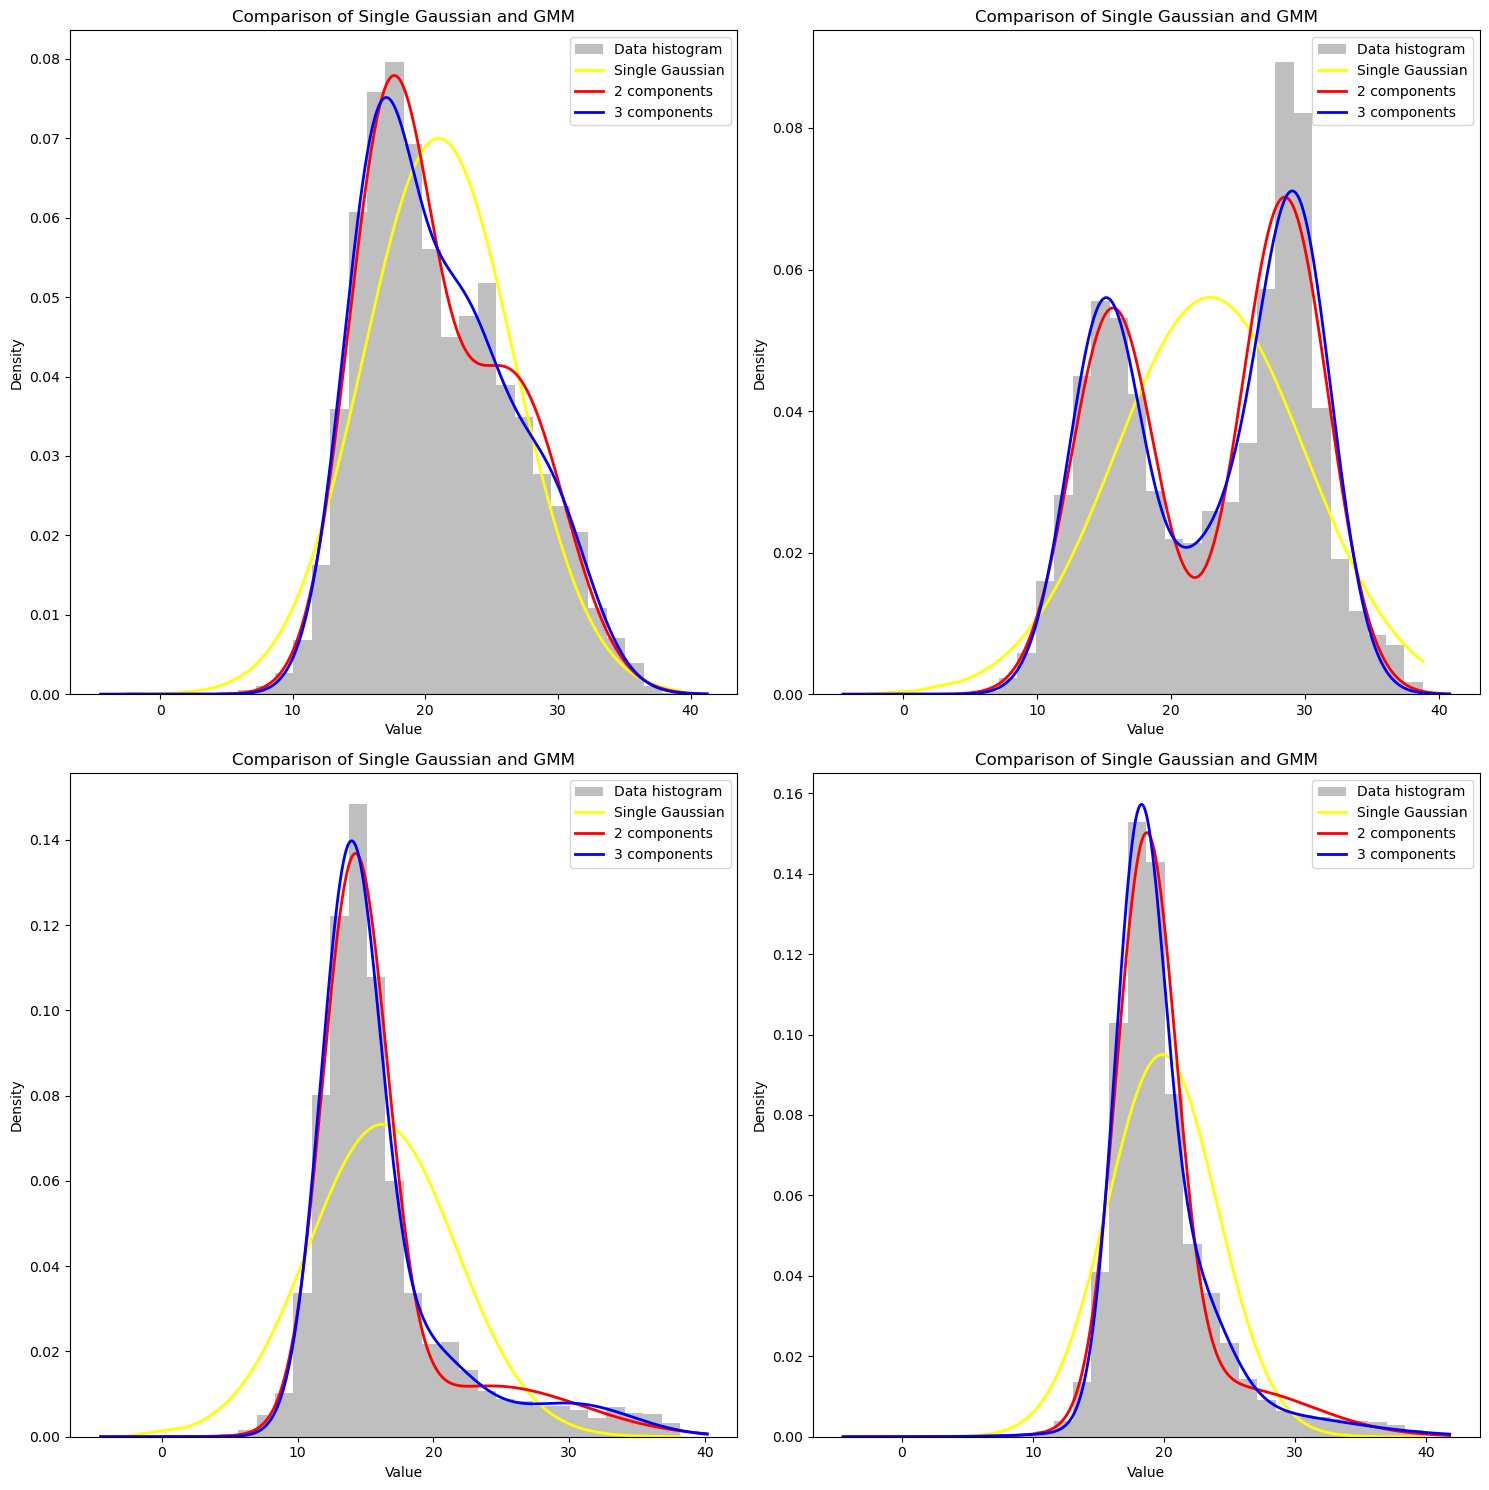

In [303]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, data in enumerate(sampled_data):
    compare_gaussian_models(data, ax=axes[i], transform='boxcox', lamb=0.4)

plt.tight_layout()
plt.show()

## Filtering out low density data

In [283]:
def filter_low_density_data(data, density_threshold=0.0005):
    """
    Filters data based on a density threshold.
    
    Parameters:
        data (array-like): The input data.
        density_threshold (float): The density threshold below which data will be cut off.
        
    Returns:
        filtered_data (array): The filtered data above the density threshold.
    """
    # Step 1: Calculate the density using KDE
    kde = stats.gaussian_kde(data)
    density = kde(data)  # Evaluate the density at the data points
    
    # Step 2: Filter data based on density threshold
    filtered_data = data[density >= density_threshold]
    
    return filtered_data



In [304]:
seg_result_0000_arr_filtered = filter_low_density_data(seg_result_0000_arr)
seg_result_0002_arr_filtered = filter_low_density_data(seg_result_0002_arr)
seg_result_0018_arr_filtered = filter_low_density_data(seg_result_0018_arr)
seg_result_0018_2_arr_filtered = filter_low_density_data(seg_result_0018_2_arr)

filtered_data = [seg_result_0000_arr_filtered, seg_result_0002_arr_filtered, seg_result_0018_arr_filtered, seg_result_0018_2_arr_filtered]


Best model according to AIC: GMM (3 components)
Best model according to BIC: GMM (3 components)


Best model according to AIC: GMM (3 components)
Best model according to BIC: GMM (3 components)


Best model according to AIC: GMM (3 components)
Best model according to BIC: GMM (3 components)


Best model according to AIC: GMM (3 components)
Best model according to BIC: GMM (3 components)




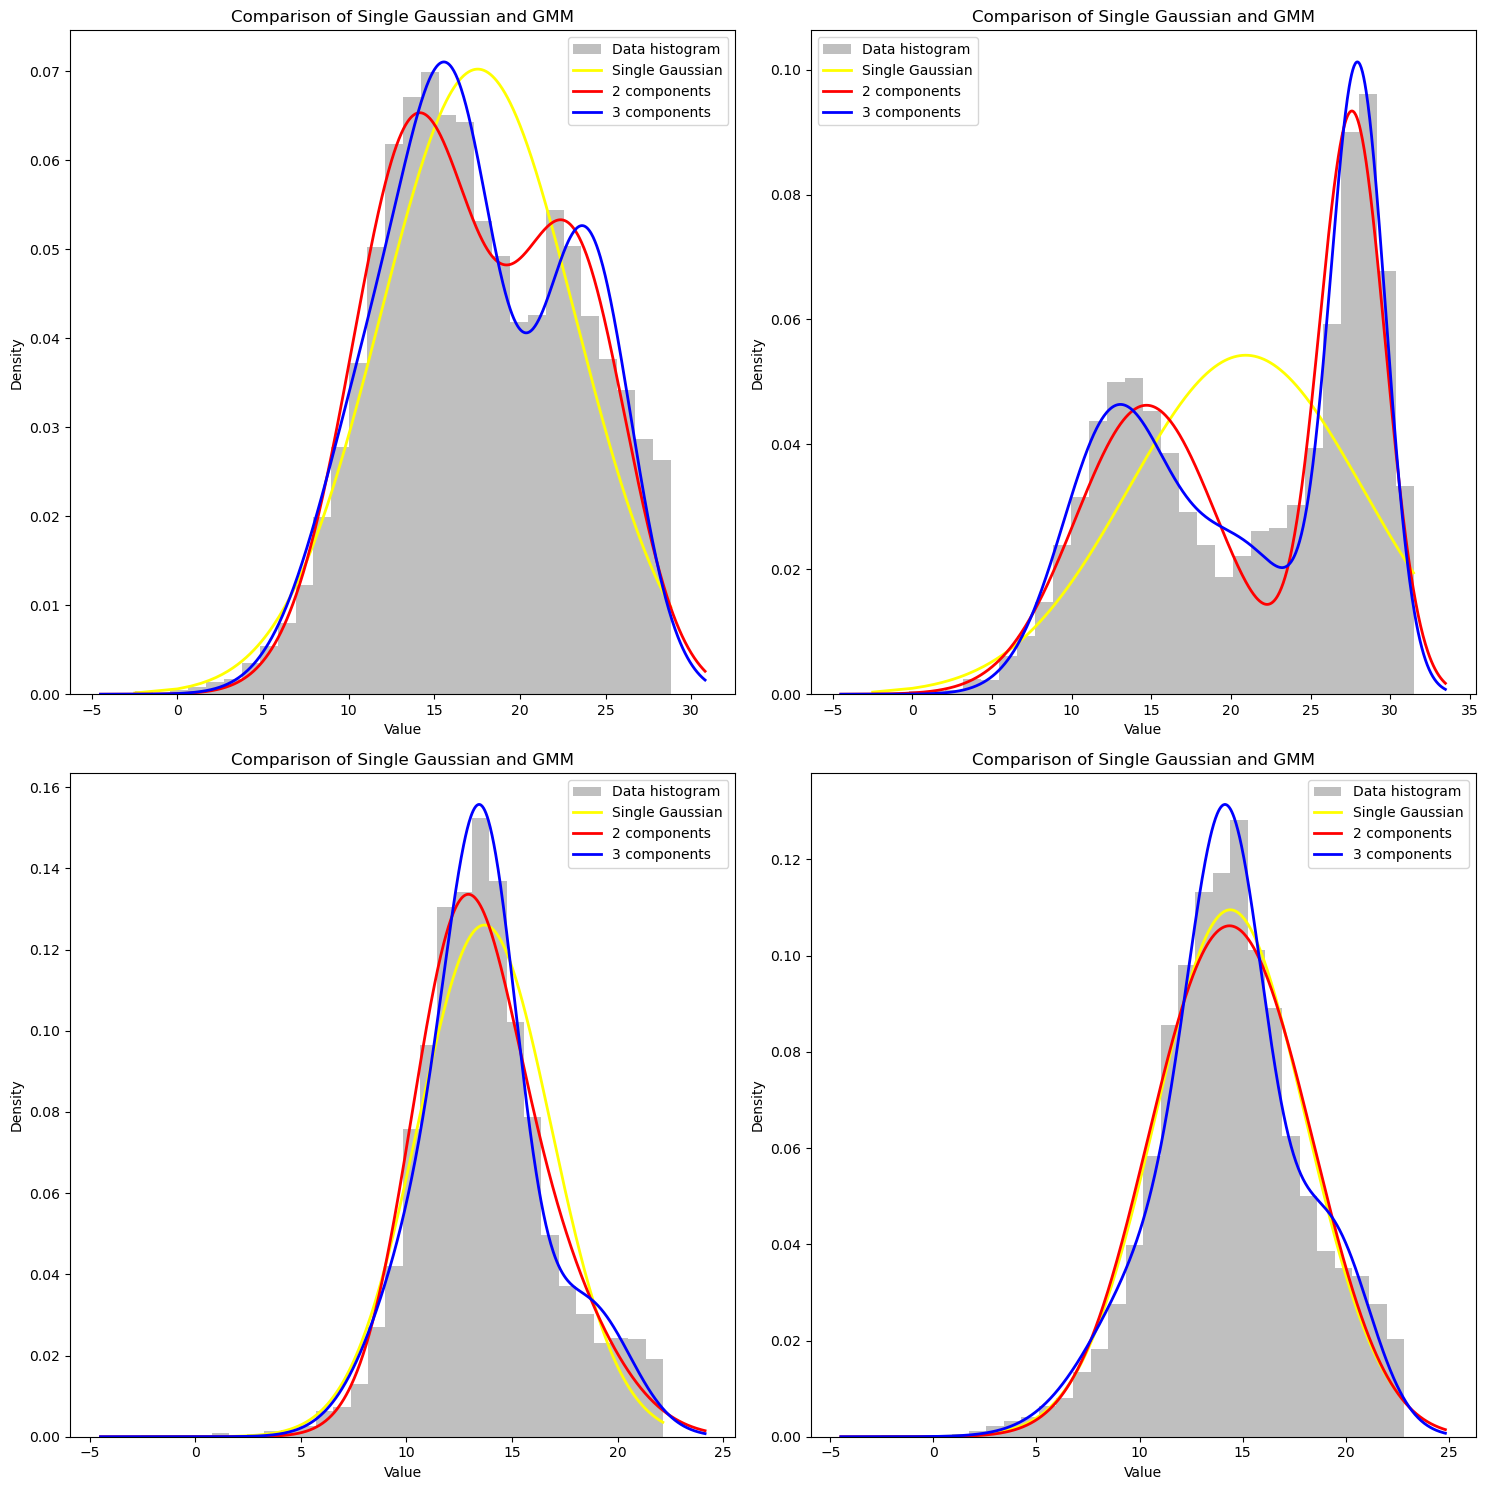

In [307]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for i, data in enumerate(filtered_data):
    compare_gaussian_models(data, ax=axes[i], transform='boxcox', lamb=0.4)

plt.tight_layout()
plt.show()